In [25]:
# Setup plotting
import matplotlib.pyplot as plt
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
    titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

beatles = pd.read_csv('./dados/beatles_spotify.csv')

beatles.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Taxman - 2022 Mix,Revolver (Super Deluxe),2022-10-28,1,1u2yF3CsOvVOMP82AgP2gJ,spotify:track:1u2yF3CsOvVOMP82AgP2gJ,0.00225,0.484,0.771,0.000000,0.718,-6.151,0.1300,133.603,0.679,57,158266
1,1,Eleanor Rigby - 2022 Mix,Revolver (Super Deluxe),2022-10-28,2,1Oo6F5Dn1s8hrUDUQuoCqB,spotify:track:1Oo6F5Dn1s8hrUDUQuoCqB,0.85300,0.606,0.304,0.000000,0.340,-7.485,0.0414,137.891,0.808,62,126466
2,2,I'm Only Sleeping - 2022 Mix,Revolver (Super Deluxe),2022-10-28,3,7sNSyrCw3F7qnMpl938JUZ,spotify:track:7sNSyrCw3F7qnMpl938JUZ,0.09440,0.559,0.479,0.000000,0.269,-7.890,0.0281,103.392,0.658,57,180320
3,3,Love You To - 2022 Mix,Revolver (Super Deluxe),2022-10-28,4,0NT88kD8fIXuwBOuXlPcmx,spotify:track:0NT88kD8fIXuwBOuXlPcmx,0.70600,0.460,0.600,0.000043,0.063,-9.108,0.0472,124.210,0.679,54,179866
4,4,"Here, There And Everywhere - 2022 Mix",Revolver (Super Deluxe),2022-10-28,5,47gNXRKcBJxu6bOvmyUroI,spotify:track:47gNXRKcBJxu6bOvmyUroI,0.87000,0.345,0.304,0.000031,0.116,-9.477,0.0297,164.568,0.425,55,144906


In [28]:
beatles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        675 non-null    int64  
 1   name              675 non-null    object 
 2   album             675 non-null    object 
 3   release_date      675 non-null    object 
 4   track_number      675 non-null    int64  
 5   id                675 non-null    object 
 6   uri               675 non-null    object 
 7   acousticness      675 non-null    float64
 8   danceability      675 non-null    float64
 9   energy            675 non-null    float64
 10  instrumentalness  675 non-null    float64
 11  liveness          675 non-null    float64
 12  loudness          675 non-null    float64
 13  speechiness       675 non-null    float64
 14  tempo             675 non-null    float64
 15  valence           675 non-null    float64
 16  popularity        675 non-null    int64  
 1

In [27]:
beatles.shape

(675, 18)

In [29]:
beatles = beatles.drop("Unnamed: 0", axis = 1)

In [30]:
beatles = beatles.drop("uri", axis = 1)

In [31]:
beatles = beatles.drop("name", axis = 1)
beatles = beatles.drop("release_date", axis = 1)
beatles = beatles.drop("id", axis = 1)

In [32]:
from sklearn.preprocessing import LabelEncoder

codificador = LabelEncoder()
codificador.fit_transform(beatles['album'])

x_prever_popularidade = beatles.copy().dropna()
y_prever_popularidade = x_prever_popularidade.pop('popularity')
albums = x_prever_popularidade['album']

In [33]:
features_numericas = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "duration_ms"]

#features_object = ["album"]

preprocessor = make_column_transformer(
    (StandardScaler(), features_numericas),
    #(OneHotEncoder(handle_unknown="ignore"), features_object),
    remainder="drop" # Jogue fora todas as colunas que não forem especificadas no transformer (vai ignorar tudo que não estiver nas duas listas de features)
)

In [34]:
# Isso é para ajudar a prevenir vazamento de sinal (para prever album).
""" def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

# treinar o modelo de prever popularidade
x_treino, x_teste, y_treino, y_teste = group_split(x_prever_popularidade, y_prever_popularidade, albums) """

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_prever_popularidade, y_prever_popularidade, train_size=0.75)

x_treino = preprocessor.fit_transform(x_treino)
x_teste = preprocessor.transform(x_teste)
# y_treino = y_treino / 100 # a popularidade está em uma escala de 0-100, reescala para 0-1.
# y_teste = y_teste / 100

input_shape = [x_treino.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [10]


c:\Users\AMD\Documents\GitHub\Aulas-de-Python-2.0\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum Validation Loss: 11.9755


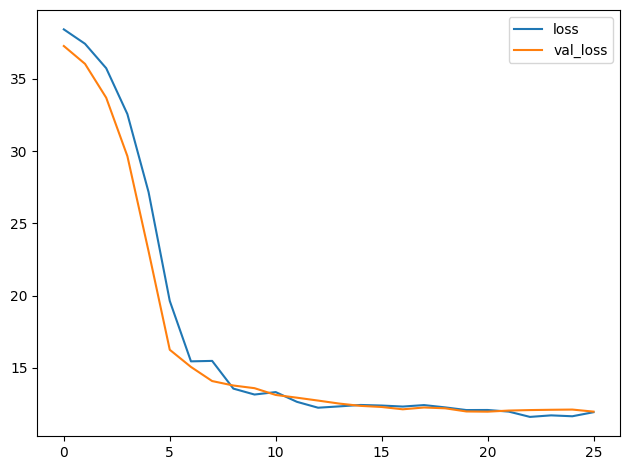

In [35]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=5,
    restore_best_weights=True,
)
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    x_treino, y_treino,
    validation_data=(x_teste, y_teste),
    batch_size=64,
    epochs=200,
    verbose=0, # suprime a saída, pois plotaremos as curvas
    callbacks=[early_stopping], # Callback adicionado
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [78]:
# testar previsão

# I Me Mine - Remastered 2009 - Popularity: 53
musica = pd.DataFrame([{
    "acousticness": 0.179,
    "danceability": 0.291,
    "energy": 0.638,
    "instrumentalness": 0.0,
    "liveness": 0.101,
    "loudness": -7.854,
    "speechiness": 0.0554,
    "tempo": 185.235,
    "valence": 0.525,
    "duration_ms": 145586,
    "album": "Let It Be (Remastered)",
}])

# From Me To You - Mono / Remastered - Popularity: 57
musica2 = pd.DataFrame([{
    "acousticness": 0.507,
    "danceability": 0.581,
    "energy": 0.821,
    "instrumentalness": 0.0,
    "liveness": 0.108,
    "loudness": -4.387,
    "speechiness": 0.0318,
    "tempo": 136.145,
    "valence": 0.968,
    "duration_ms": 116160,
    "album": "1 (Remastered)",
}])

# Memphis, Tennessee - Live At The BBC For "Pop Go The Beatles" / 30th July, 1963 - Popularity: 24
musica3 = pd.DataFrame([{
    "acousticness": 0.613,
    "danceability": 0.77,
    "energy": 0.411,
    "instrumentalness": 0.00275,
    "liveness": 0.0875,
    "loudness": -11.981,
    "speechiness": 0.0447,
    "tempo": 97.793,
    "valence": 0.538,
    "duration_ms": 135786,
    "album": "Live At The BBC (Remastered)",
}])

# Boys - Remastered 2009 - Popularity: 47
musica4 = pd.DataFrame([{
    "acousticness": 0.607,
    "danceability": 0.402,
    "energy": 0.86,
    "instrumentalness": 0.0,
    "liveness": 0.736,
    "loudness": -10.31,
    "speechiness": 0.0504,
    "tempo": 142.445,
    "valence": 0.822,
    "duration_ms": 146440,
    "album": "Please Please Me (Remastered)",
}])

# aplicar o mesmo preprocessor usado no treino
musica_prep = preprocessor.transform(musica4)

previsao = model.predict(musica_prep)
# previsao_formatada = float(previsao[0][0])
print(f"Popularity predicted: {previsao[0][0]:.0f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Popularity predicted: 31
